<strong><b><font size="5">Web Scraping e Análise de Dados</font></b></strong>

<strong><b><font size="5">Laborátorio 1</font></b></strong>

<strong><b><font size="4">Scraping, Processamento de Linguagem Natural e Análise de Dados em Portais de Vagas no Brasil</font></b></strong>

Neste Laboratório iremos conectar em um dos maiores portais de vagas do Brasil, o Indeed, fazer web scraping de dados sobre as vagas em Data Science e então analisar os dados, extraindo insights e aplicando Processamento de Linguagem Natural. O exemplo pode ser facilmente aplicado a outros portais, com os devidos ajustes.

Usaremos o Chromedriver para o processo de extração. Acesse o endereço abaixo, faça o download do arquivo de acordo com seu sistema operacional, descompacte o zip e coloque o arquivo na mesma pasta onde está este Jupyter Notebook.

https://sites.google.com/a/chromium.org/chromedriver/home

## Carregando os Pacotes Usados Neste Jupyter Notebook

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão Python:', python_version())

Versão Python: 3.7.3


In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [ ]:
# Precisaremos do selenium
# Pacote utilizado para automatizar a interação do navegador web a partir do python.
!pip install -q selenium

In [2]:
# Imports
import bs4
import selenium
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
from collections import Counter
%matplotlib inline

In [3]:
# Utilizaremos o NLTK para realizar o Processamento de Linguagem Natural
import nltk

In [3]:
# Somente Execute essa célula caso não tenha feito o download dos arquivos nltk.
# Temos que fazer o download do dicionário e demais pacotes do NLTK
# Vai abrir outra janela do navegador solicitando a seleção dos itens para download. 
# Selecione todos os itens com o mouse e então clique em Download. Feche a janela quando terminar.
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
# Tokenização é o processo de quebrar uma sentença em palavras, palavras em letras e etc...
# Essa tarefa faz parte do processamento de linguagem natural. 
# Vamos importar a função word_tokenize.
from nltk import word_tokenize

In [5]:
# As stopwords são palavras comuns, como artigos, advérbios ou conjunções.
# As stopwords devem ser removidas no processamento de linguagem natural.
# Vamos importar a função stopwords.
from nltk.corpus import stopwords

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

selenium.webdriver 3.14.1
bs4                4.7.1
matplotlib         3.2.1
numpy              1.18.4
pandas             1.0.4
selenium           3.141.0
nltk               3.4



## Web Scraping

In [7]:
# Cria o driver de conexão. Será aberta outra janela do navegador. Não feche-a e mantenha aberta durante a extração.
# No lugar do Chrome pode-se usar FireFox ou outro navegador.
driver = webdriver.Chrome("./chromedriver")

In [61]:
# Cria o dataframe para receber os dados
dados = pd.DataFrame(columns = ["Titulo", "Localidade", "Empresa", "Salario", "Tipo_Pesquisa", "Desc", "Sumario"])

A url abaixo foi gerada da seguinte forma:
    
- 1- Acesso ao site https://www.indeed.com.br

- 2- Seleção dos filtros de pesquisa de vagas com o termo "Data Science" e localidade "Brasil"

- 3- Copiado a url na barra de endereço do navegador.

Você pode executar o mesmo procedimento e customizar sua busca, alterando localidade ou o tipo de vaga por exemplo. Copie a url e coloque na célula abaixo. Então execute o Jupyter Notebook novamente.

###### Evite executar a célula abaixo muitas vezes seguidas ou seu acesso pode ser bloqueado pelo site.

In [9]:
# Abre a conexão com o site e faz a pesquisa
driver.get("https://www.indeed.com.br/jobs?q=data+science&l=brasil")
# Apenas 15 segundos de espera na coleta para não carregar muitos dados para otimizar o tempo.
driver.implicitly_wait(15)

O resultado da execução acima, será carregado dentro da pagina web que foi aberta quando iniciamos o webdrive.chrome

In [10]:
# Aplica a busca no site através da class==Result
resultado = driver.find_elements_by_class_name("result")

In [11]:
# Tipo do objeto
type(resultado)

list

In [48]:
resultado

[<selenium.webdriver.remote.webelement.WebElement (session="6c97dcd708555356cc47fbcdc6cb3c89", element="9efac590-c727-4f5a-b36e-17fcda74d20b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6c97dcd708555356cc47fbcdc6cb3c89", element="d67745e8-c369-4606-a37f-b2b5c981e3f0")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6c97dcd708555356cc47fbcdc6cb3c89", element="e92334bb-89c5-4450-8a88-676f1af040eb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6c97dcd708555356cc47fbcdc6cb3c89", element="e68adf0e-215c-4735-a482-e261d486c9ab")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6c97dcd708555356cc47fbcdc6cb3c89", element="2ffbf644-8128-46b6-a4d2-368a176c5432")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6c97dcd708555356cc47fbcdc6cb3c89", element="592a41fc-341a-4444-b6bd-61bfd520e8af")>,
 <selenium.webdriver.remote.webelement.WebElement (session="6c97dcd708555356cc47fbcdc6cb3c89", element="c1b62cbf-ebff-41f8-901d-12

### ATENÇÃO: TODA A MÁGICA DO WEB SCRAPING OCORRE NESSE TRECHO DE CÓDIGO.
#### Fique Ligado!

###### O padrão abaixo implementado se deve a estrutura que o site está montado. Outros sites podem possuir diferentes estruturas.

###### O Código abaixo leva um tempinho para ser executado.

In [62]:
# Loop pelos resultados obtidos do scraping e aplicando a extração dos dados nas tags HTML que desejamos.
for vaga in resultado:
    
    # Coletando o elemento HTML interno
    result_html = vaga.get_attribute('innerHTML')
    
    # Aplicando o parser do código HTML
    soup = BeautifulSoup(result_html, 'html.parser')

    # Buscando as tags para análise. 
    # Usaremos blocos try/except para evitar erros na execução, no caso de alguma informação não estar disponível na vaga
    
    # Título da vaga
    try:
        title = soup.find("a", class_ = "jobtitle").text.replace('\n', '')
    except:
        title = 'None'
    
    # Localidade
    try:
        location = soup.find(class_ = "location").text
    except:
        location = 'None'
    
    # Empresa
    try:
        company = soup.find(class_ = "company").text.replace('\n', '').strip()
    except:
        company = 'None'
    
    # Salário
    try:
        salary = soup.find("a", class_ = "salary").text.replace('\n', '').strip()
    except:
        salary = 'None'
    
    # Tipo de pesquisa (orgânica ou patrocinada)
    try:
        sponsored = soup.find("a", class_ = "sponsoredGray").text
        sponsored = "Sponsored"
    except:
        sponsored = 'Organic'
        
    # Aqui buscamos o sumário
    try:
        sum_div = vaga.find_elements_by_class_name("summary")[0]        
        sum_div.click() # Abre uma nova aba no navegador com os dados do sumario da vaga
        result_sum_div = sum_div.get_attribute('innerHTML')
        # Aplicando o parser do código HTML
        soup_sum_div = BeautifulSoup(result_sum_div, 'html.parser')
    
        try:
            sumario = soup_sum_div.find("li", style = "margin-bottom:0px;").text.replace('\n', '').strip()
        except:
            sumario = 'None'                      
        
        
    except:
        sum_div = "None"
        
    # Descrição da vaga
    try:
        job_desc = driver.find_element_by_id('vjs-desc').text                    
    except:
        job_desc = "None"
    
    # Gravamos o resultado em nosso dataframe
    dados = dados.append({"Titulo":title, 
                          "Localidade":location, 
                          "Empresa":company, 
                          "Salario":salary, 
                          "Tipo_Pesquisa":sponsored, 
                          "Desc":job_desc,
                          "Sumario": sumario}, 
                         ignore_index = True)

In [64]:
# Shape
dados.shape

(15, 7)

In [65]:
dados

,Titulo,Localidade,Empresa,Salario,Tipo_Pesquisa,Desc,Sumario
0,Applied Data Scientist,"São Paulo, SP",dunnhumby,None,Organic,dunnhumby is the world’s leading customer scie...,Deploy data science algorithms and market prod...
1,Desenvolvedor(a) Data Science Python pleno (re...,Brasil,GeekHunter,None,Organic,"Esta é uma vaga de um cliente da GeekHunter, c...","Esta é uma vaga de um cliente da GeekHunter, c..."
2,Data Expert,"São Paulo, SP",Unilever,None,Organic,Background\n\nFor Unilever to remain competiti...,Facilitate data integration and data explorati...
3,Data Scientist en Vie Brésil (H/F),"São Paulo, SP",Keyrus,None,Organic,Vos missions :\nAccompagner nos clients dans l...,Accompagner nos clients dans la formalisation ...
4,Estágio em Data Science,"Florianópolis, SC",Programa de Estágio,None,Organic,Vos missions :\nAccompagner nos clients dans l...,Accompagner nos clients dans la formalisation ...
5,Head Data Science,"Nova Lima, MG",Viridis Energy,None,Organic,Vos missions :\nAccompagner nos clients dans l...,Accompagner nos clients dans la formalisation ...
6,Analista de Banco de Dados - Data Science,"Recife, PE",FindUP,None,Organic,Vos missions :\nAccompagner nos clients dans l...,Accompagner nos clients dans la formalisation ...
7,Estágio - Ciências da Computação/Sistemas de i...,"Santo Antônio de Lisboa, SC",IEL/SC,None,Organic,Vos missions :\nAccompagner nos clients dans l...,Accompagner nos clients dans la formalisation ...
8,Data Science Immersive Instructor,Amazonas,GA Instructor,None,Organic,Vos missions :\nAccompagner nos clients dans l...,Accompagner nos clients dans la formalisation ...
9,Data Science - Sênior,"São Paulo, SP",PicPay,None,Organic,Vos missions :\nAccompagner nos clients dans l...,Accompagner nos clients dans la formalisation ...


Agora podemos iniciar a análise de Dados!! 

Salvando em disco os dados obtidos para caso seja necessário, não precisar executar o scraping no site novamente.

In [66]:
# Salvamos os dados em disco
dados.to_csv('resultado/dados.csv', encoding = "utf-8", index = False)

## Análise de Dados

In [67]:
# Carregando o dataset salvo
df = pd.read_csv("resultado/dados.csv", encoding = "utf-8")

In [68]:
# Visualiza os dados
df.head()

,Titulo,Localidade,Empresa,Salario,Tipo_Pesquisa,Desc,Sumario
0,Applied Data Scientist,"São Paulo, SP",dunnhumby,None,Organic,dunnhumby is the world’s leading customer scie...,Deploy data science algorithms and market prod...
1,Desenvolvedor(a) Data Science Python pleno (re...,Brasil,GeekHunter,None,Organic,"Esta é uma vaga de um cliente da GeekHunter, c...","Esta é uma vaga de um cliente da GeekHunter, c..."
2,Data Expert,"São Paulo, SP",Unilever,None,Organic,Background\n\nFor Unilever to remain competiti...,Facilitate data integration and data explorati...
3,Data Scientist en Vie Brésil (H/F),"São Paulo, SP",Keyrus,None,Organic,Vos missions :\nAccompagner nos clients dans l...,Accompagner nos clients dans la formalisation ...
4,Estágio em Data Science,"Florianópolis, SC",Programa de Estágio,None,Organic,Vos missions :\nAccompagner nos clients dans l...,Accompagner nos clients dans la formalisation ...


### Tarefa 1: Qual o tipo de vaga mostrado na pesquisa, orgânica ou patrocinada?

In [69]:
# Vamos contar o total de registros por valor da coluna "Tipo_Pesquisa"
df["Tipo_Pesquisa"].value_counts()

Organic    15
Name: Tipo_Pesquisa, dtype: int64

Todas as vagas foram orgânicas.

### Tarefa 2: Quais empresas tem o maior número de vagas listadas?

In [70]:
# Agrupa o dataset por empresa
grupo1 = df.groupby("Empresa").count()["Titulo"].sort_values(ascending = False)

In [71]:
# Visualiza os dados
grupo1.head()

Empresa
managementsolutions    1
dunnhumby              1
Viridis Energy         1
Unilever               1
Samsung Electronics    1
Name: Titulo, dtype: int64

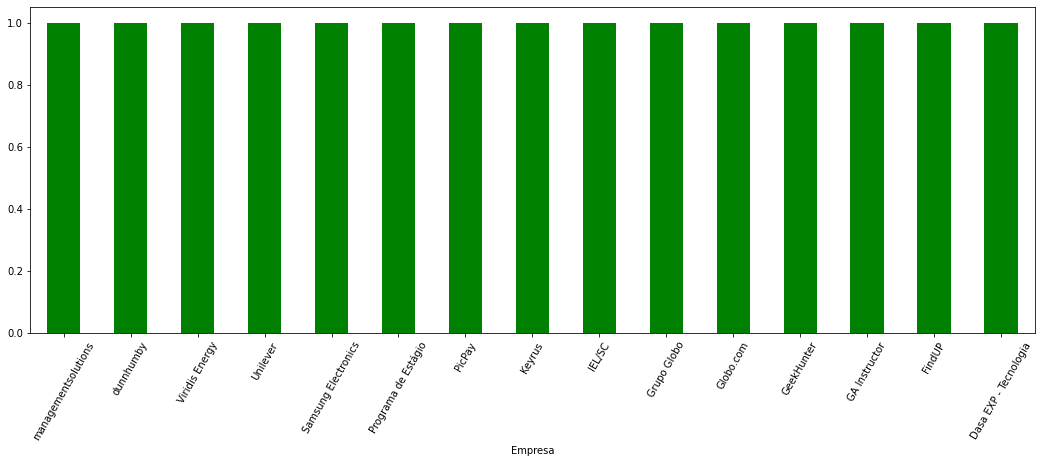

In [72]:
# Gráfico
grupo1.plot(kind = "bar", figsize = (18,6), color = "green", rot = 60)

Como a coleta foi pequena e não avançamos para outras páginas do site, o retorno acabou sendo 1 vaga de cada empresa.

### Tarefa 3: Qual localidade tem o maior número de vagas listadas?

In [73]:
# Busca localidade com mais vagas
grupo2 = df.groupby("Localidade").count()["Titulo"].sort_values(ascending = False)

In [74]:
# Visualiza os dados
grupo2.head()

Localidade
São Paulo, SP                  8
Santo Antônio de Lisboa, SC    1
Recife, PE                     1
Nova Lima, MG                  1
Florianópolis, SC              1
Name: Titulo, dtype: int64

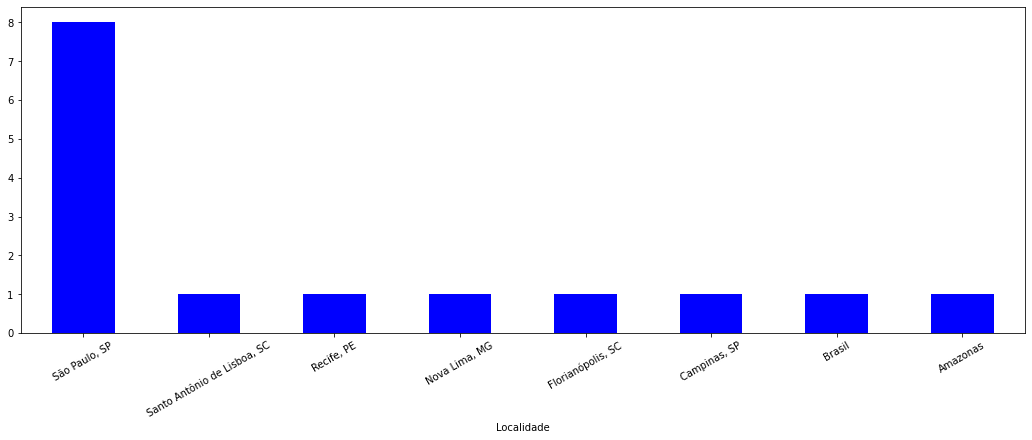

In [75]:
# Gráfico
grupo2.plot(kind = "bar", figsize = (18,6), color = "blue", rot = 30)

### Tarefa 4: Quais os skills mais comuns nas descrições das vagas?

Agora aplicamos Processamento de Linguagem Natural para extrair alguns insights das descrições das vagas.

In [76]:
# Função de limpeza dos dados
def limpa_dados(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words_pt]
    desc = [word for word in desc if word not in stop_words_en]
    return desc

In [77]:
# Vamos definir a lista de stopwords em português
stop_words_pt = stopwords.words('portuguese')

In [78]:
# Vamos definir a lista de stopwords em inglês
stop_words_en = stopwords.words('english')

In [79]:
# Vamos definir a lista de stopwords em Espanhol
stop_words_spain = stopwords.words('spanish')

In [80]:
# Aplicamos a função de limpeza a coluna de Sumario da vaga
desc_vagas = df["Desc"].apply(limpa_dados)

In [81]:
# Visualiza os dados
desc_vagas.head()

0    [dunnhumby, world, leading, customer, science,...
1    [vaga, cliente, geekhunter, ter, acesso, infor...
2    [background, unilever, remain, competitive, fu...
3    [missions, accompagner, clients, dans, formali...
4    [missions, accompagner, clients, dans, formali...
Name: Desc, dtype: object

In [82]:
# Vamos sumarizar as descrições das vagas
desc_itens = desc_vagas.apply(Counter).sum().items()

In [83]:
# Ordenamos o resultado
desc_itens = sorted(desc_itens, key = lambda kv: kv[1], reverse = True)

In [89]:
desc_itens

[('data', 89),
 ('des', 72),
 ('dans', 36),
 ('besoins', 36),
 ('données', 36),
 ('learning', 30),
 ('business', 29),
 ('clients', 28),
 ('complexes', 24),
 ('les', 24),
 ('aux', 24),
 ('modèles', 24),
 ('ecole', 24),
 ('connaissance', 24),
 ('science', 23),
 ('machine', 16),
 ('intelligence', 15),
 ('power', 14),
 ('analyse', 13),
 ('technique', 13),
 ('volumes', 13),
 ('paulo', 13),
 ('possible', 13),
 ('transformation', 13),
 ('missions', 12),
 ('accompagner', 12),
 ('formalisation', 12),
 ('leurs', 12),
 ('métier', 12),
 ('sous', 12),
 ('forme', 12),
 ('problématiques', 12),
 ('claires', 12),
 ('réalisables', 12),
 ('explorer', 12),
 ('larges', 12),
 ('hétérogènes', 12),
 ('afin', 12),
 ('extraire', 12),
 ('connaissances', 12),
 ('utiles', 12),
 ('pour', 12),
 ('prise', 12),
 ('décision', 12),
 ('restituer', 12),
 ('métiers', 12),
 ('mettre', 12),
 ('place', 12),
 ('deep', 12),
 ('permettant', 12),
 ('modéliser', 12),
 ('phénomènes', 12),
 ('répondre', 12),
 ('variés', 12),
 ('déte

In [84]:
# Criamos uma série a partir da lista de tuplas gerada
desc_itens_serie = pd.Series({k: v for k, v in desc_itens})

In [85]:
# Visualizamos os dados, com a contagem de palavras mais frequentes nas descrições das vagas
desc_itens_serie.head(15)

data            89
des             72
dans            36
besoins         36
données         36
learning        30
business        29
clients         28
complexes       24
les             24
aux             24
modèles         24
ecole           24
connaissance    24
science         23
dtype: int64

In [86]:
# Criando uma lista de skills para pesquisar como eles aparecem nas descrições das vagas
# As palavras estão em minúsculo devido a limpeza nos dados aplicado anteriormente.
skills = ["python", "statistics", "analytics", "business", "projects", "develop"]

In [91]:
# Filtramos a série com os skills
filtro_skills = desc_itens_serie.filter(items = skills)

In [92]:
filtro_skills

python         3
statistics     2
analytics      8
business      29
projects       4
dtype: int64

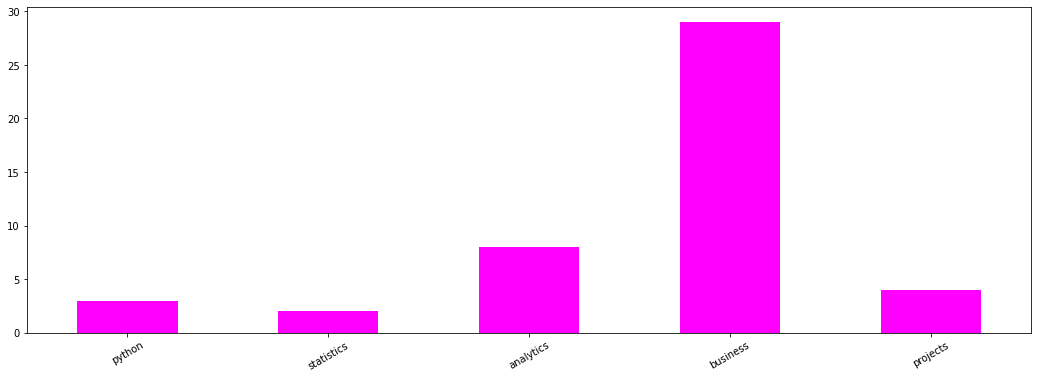

In [88]:
# Criamos o plot
filtro_skills.plot(kind = 'bar', figsize = (18,6), color = "magenta", rot = 30)

A palavra "Python" apareceu com frequência em 3 vagas, superando a palavra "Estatística" (2 vagas) e abaixo da palavra "Analytics" (8 vagas).

A palavra que aparece com maior frequência nas descrições das vagas dentr as quais filtramos é "Business". Por que será? Isso ocorre pois vagas para Data Science contam com um fator fundamental que é: Conhecimento de Negócios.